# Imports

In [1]:
import dd.cudd as _bdd
from game.generator import random_game
from game.visualizer import graphgame_viz

from zielonka import zielonka, ziel_with_psolver

from psolvers import buchi_solver, good_ep_solver, lay_solver, psolB

from gen import generator_gen, classical, visualizer_gen
from psolvers_gen import buchi_solver_gen, good_ep_solver_gen, lay_solver_gen

# Init game

In [2]:
bdd = _bdd.BDD()
rgame = random_game(bdd, 5,2,1,2)

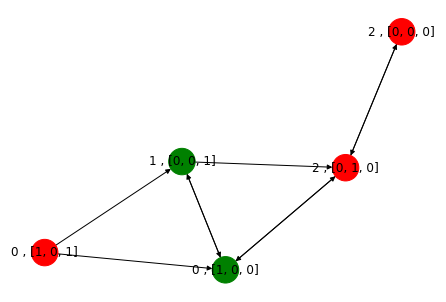

In [3]:
graphgame_viz(bdd, rgame)

# Zielonka

In [3]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_ziel,w1_ziel) = zielonka(bdd, g_copy)

In [4]:
print(list(bdd.pick_iter(w0_ziel)))
print(list(bdd.pick_iter(w1_ziel)))

[{'x2': False, 'x0': False, 'x1': False}, {'x2': True, 'x0': False, 'x1': False}, {'x0': False, 'x1': True, 'x2': False}, {'x2': False, 'x0': True, 'x1': False}, {'x2': True, 'x0': True, 'x1': False}]
[]


## Buchi solver

In [6]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_buchi, w1_buchi, _) = ziel_with_psolver(bdd, g_copy, buchi_solver.buchi_solver)

In [7]:
assert(w0_buchi == w0_ziel)
assert(w1_buchi == w1_ziel)

## PsolB

In [8]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_psolB, w1_psolB, _) = ziel_with_psolver(bdd, g_copy, psolB.psolB)

In [9]:
assert(w0_psolB == w0_ziel)
assert(w1_psolB == w1_ziel)

In [10]:
print(list(bdd.pick_iter(w0_psolB)))
print(list(bdd.pick_iter(w1_psolB)))

[{'x2': False, 'x0': False, 'x1': False}, {'x2': True, 'x0': False, 'x1': False}, {'x0': False, 'x1': True, 'x2': False}, {'x2': False, 'x0': True, 'x1': False}, {'x2': True, 'x0': True, 'x1': False}]
[]


## Good Ep Solver

In [6]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_good_ep, w1_good_ep, _) = ziel_with_psolver(bdd, g_copy, good_ep_solver.good_ep_solver)

PSolver winning regions not empty


In [7]:
assert(w0_good_ep == w0_ziel)
assert(w1_good_ep == w1_ziel)

## Lay Solver

In [8]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
(w0_lay, w1_lay) = ziel_with_psolver(bdd, g_copy, lay_solver.lay_solver)

PSolver winning regions not empty


In [9]:
assert(w0_lay == w0_ziel)
assert(w1_lay == w1_ziel)

## Little benchmark

In [2]:
for i in range(50):
    bdd = _bdd.BDD()
    rgame = random_game(bdd, 500,4,1,5)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_ziel,w1_ziel) = zielonka(bdd, g_copy)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_buchi, w1_buchi, psolver_usefull) = ziel_with_psolver(bdd, g_copy, buchi_solver.buchi_solver)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_good_ep, w1_good_ep, psolver_usefull) = ziel_with_psolver(bdd, g_copy, good_ep_solver.good_ep_solver)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_lay, w1_lay, psolver_usefull) = ziel_with_psolver(bdd, g_copy, lay_solver.lay_solver)
    assert(w0_good_ep == w0_ziel)
    assert(w1_good_ep == w1_ziel)
    assert(w0_buchi == w0_ziel)
    assert(w1_buchi == w1_ziel)
    assert(w0_lay == w0_ziel)
    assert(w1_lay == w1_ziel)

# Generalized parity games

## Init game

In [2]:
bdd = _bdd.BDD()
rgame_gen = generator_gen.random_game_gen(bdd, 5,[1,2],1,3)

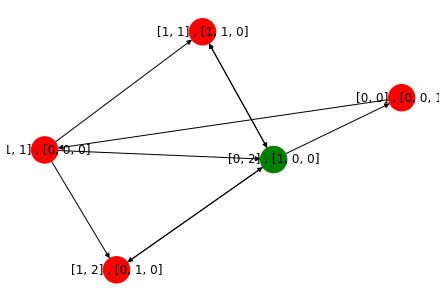

In [189]:
visualizer_gen.graphgame_viz(bdd, rgame_gen)

In [111]:
print(bdd.to_expr(rgame_gen.phi_0 | rgame_gen.phi_1))

(~ ite(x0, x2, ite(x1, x2, FALSE)))


## Classical

In [155]:
g_copy = rgame_gen.induced_game(bdd, rgame_gen.phi_0 | rgame_gen.phi_1)
w0_class, w1_class = classical.classical(bdd, g_copy)

In [156]:
print(bdd.to_expr(w0_class))
print(bdd.to_expr(w1_class))

FALSE
(~ ite(x0, ite(x1, TRUE, x2), FALSE))


## Buchi_gen PSolver

In [8]:
g_copy = rgame_gen.induced_game(bdd, rgame_gen.phi_0 | rgame_gen.phi_1)
w0_buchi, w1_buchi = classical.classical_with_psolver(bdd, g_copy, buchi_solver_gen)

NameError: name 'classical_with_psolver' is not defined

In [233]:
assert w0_buchi == w0_class
assert w1_buchi == w1_class

## Good_ep_solver

In [ ]:
g_copy = rgame_gen.induced_game(bdd, rgame_gen.phi_0 | rgame_gen.phi_1)
w0_good_ep, w1_good_ep = classical.classical_with_psolver(bdd, g_copy, good_ep_solver_gen.good_ep_solver_gen)

In [ ]:
assert w0_good_ep == w0_class
assert w1_good_ep == w1_class

## Lay_solver

In [266]:
bdd = _bdd.BDD()
rgame_gen = generator_gen.random_game_gen(bdd, 5,[1,2],1,3)

In [17]:
print(bdd.to_expr(w0_class))
print(bdd.to_expr(w1_class))

(~ ite(x0, x1, ite(x1, x2, FALSE)))
FALSE


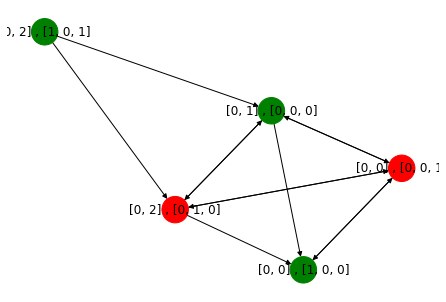

In [18]:
visualizer_gen.graphgame_viz(bdd, rgame)

In [13]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
w0_class, w1_class = classical.classical(bdd, g_copy)

In [31]:
g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
w0_lay, w1_lay = classical.classical_with_psolver(bdd, g_copy, lay_solver_gen)

Curr prio : 0
Min_prio : 1
f_old : []
p : 3
u_p : []
u_p_bis' : []
p : 1
u_p : []
u_p_bis' : []
lay_attr_f : []
Curr prio : 1
Min_prio : 1
f_old : [{'x0': False, 'x1': False, 'x2': False}]
p : 3
u_p : []
u_p_bis' : []
p : 1
u_p : [{'x0': False, 'x1': False, 'x2': False}]
u_p_bis' : [{'x0': False, 'x1': True, 'x2': False}, {'x0': True, 'x1': False, 'x2': True}]
lay_attr_f : [{'x2': False, 'x0': False, 'x1': False}, {'x2': True, 'x0': False, 'x1': False}, {'x0': False, 'x1': True, 'x2': False}, {'x0': True, 'x1': False, 'x2': False}]
[{'x0': False, 'x1': False, 'x2': False}]
True
False


In [269]:
assert w0_lay == w0_class
assert w1_lay == w1_class

In [21]:
print(bdd.to_expr(w0_lay))
print(bdd.to_expr(w1_lay))

FALSE
(~ ite(x0, x1, ite(x1, x2, FALSE)))


In [30]:
from copy import copy

from attractors import attractors
from itertools import product
import dd.cudd as _bdd

def lay_solver_gen(bdd, g):
    if g.phi_0 | g.phi_1 == bdd.false:
        return bdd.false, bdd.false

    # Search for winning vertices for player 1
    for prio_f_index in range(g.k):
        print("Curr prio : " + str(prio_f_index))
        if g.d[prio_f_index] % 2 == 1:
            init_prio = g.d[prio_f_index]
        else:
            init_prio = g.d[prio_f_index] - 1
        for min_prio in range(init_prio, -1, -2):
            print("Min_prio : " + str(min_prio))
            w = lay_ep_1(bdd, g, min_prio, prio_f_index)
            if not w == bdd.false:
                print(str(list(bdd.pick_iter(w))))
                x = attractors.attractor(bdd, g, 1, w)
                ind_game = g.induced_game(bdd, ~x)
                (z0, z1) = lay_solver_gen(bdd, ind_game)
                return z0, z1 | x

    # Search for winning vertices for player 0
    min_even_prio = [[] for _ in range(g.k)]
    for prio_f_index in range(g.k):
        if g.d[prio_f_index] % 2 == 0:
            init_prio = g.d[prio_f_index]
        else:
            init_prio = g.d[prio_f_index] - 1
        for curr_prio in range(init_prio, -1, -2):
            min_even_prio[prio_f_index].append(curr_prio)
    all_combinations = product(*min_even_prio)
    init_ext_game_infos(bdd, g)

    for comb in all_combinations:
        w = lay_ep_full_0(bdd, g, comb)
        if not w == bdd.false:
            x = attractors.attractor(bdd, g, 0, w)
            ind_game = g.induced_game(bdd, ~x)
            (z0, z1) = lay_solver_gen(bdd, ind_game)
            return z0 | x, z1

    return bdd.false, bdd.false


def init_ext_game_infos(bdd, g):
    em_vars_n = g.k
    g.em_vars = ['n{i}'.format(i=i) for i in range(em_vars_n)]
    g.em_vars_bis = ['n{i}_bis'.format(i=i) for i in range(em_vars_n)]
    em_mapping = dict(zip(g.em_vars, g.em_vars_bis))
    bdd.declare(*g.em_vars)
    bdd.declare(*g.em_vars_bis)
    g.mapping_bis.update(em_mapping)


def lay_ep_1(bdd, g, min_prio, c_prio_f):
    
    f_old = g.sup_prio_expr_odd(bdd, min_prio, c_prio_f)
    print("f_old : " + str(list(bdd.pick_iter(f_old))))
    while True:
        lay_attr_f = lay_attr(bdd, g, min_prio, f_old, c_prio_f)
        print("lay_attr_f : " + str(list(bdd.pick_iter(lay_attr_f))))
        f = f_old & lay_attr_f
        if f == f_old or f == bdd.false:
            break
        f_old = f
    return f


def lay_ep_full_0(bdd, g, q):
    max_prios = [0 for i in range(g.k)]
    for c_prio in range(g.k):
        if g.d[c_prio] % 2 == 1:
            max_prios[c_prio] = (g.d[c_prio] - 1)
        else:
            max_prios[c_prio] = (g.d[c_prio])
    f_old = g.sup_all_prio_even(bdd, q)
    while True:
        lay_attr_f = lay_attr_full(bdd, g, q, f_old, max_prios)

        f = f_old & lay_attr_f

        if f == f_old or f == bdd.false:
            break
        f_old = f
    return f


def compute_tau_ext(bdd, g, min_prios):
    res_expr = bdd.true

    for prio_f_index in range(g.k):
        # active in prec
        active_prio_1 = bdd.var(g.em_vars[prio_f_index])
        # active in current node
        active_prio_2 = bdd.let(g.mapping_bis, g.sup_prio_expr_even(bdd, min_prios[prio_f_index], prio_f_index))
        active_prio = active_prio_1 | active_prio_2

        res_expr = res_expr & (active_prio & bdd.var(g.em_vars_bis[prio_f_index]) | ~active_prio & ~bdd.var(
            g.em_vars_bis[prio_f_index]))

    return res_expr & g.tau


def lay_attr(bdd, g, min_prio, u, c_prio):
    if g.d[c_prio] % 2 == 0:
        init_prio = g.d[c_prio] + 1
    else:
        init_prio = g.d[c_prio] + 2

    b = bdd.false
    for curr_prio in range(init_prio, min_prio - 1, - 2):
        u_p = u & g.sup_prio_expr(bdd, curr_prio, c_prio)
        u_p_bis = g.sup_prio_expr_even(bdd, curr_prio + 1, c_prio)
        #print("p : " + str(curr_prio))
        #print("u_p : " + str(list(bdd.pick_iter(u_p))))
        #print("u_p_bis' : " + str(list(bdd.pick_iter(u_p_bis))))
        p_safe_attr = attractors.p_safe_attractor(bdd, g, 1, u_p | b, u_p_bis & ~b)
        b = b | p_safe_attr
    return b


def lay_attr_full(bdd, g, q, u, max_prios):
    p = copy(max_prios)
    p_changed = True
    c = bdd.false
    b = bdd.false
    while p_changed:
        tau_e = compute_tau_ext(bdd, g, p)
        t = u
        for prio_f_index in range(g.k):
            t = t & bdd.var(g.em_vars[prio_f_index])
        t_bis = g.sup_one_prio_odd(bdd, p)
        b = p_safe_attractor_full(bdd, g, 0, tau_e, t | c, t_bis & ~c)

        # For a vertice (v,n) check that n = N_p(v)
        id_prio_n = bdd.true
        for curr_f in range(g.k):
            greater_even_prio = g.sup_prio_expr_even(bdd, p[curr_f], curr_f)
            corr_n = greater_even_prio & bdd.var(g.em_vars[curr_f])
            not_corr_n = ~greater_even_prio & ~bdd.var(g.em_vars[curr_f])
            id_prio_n = id_prio_n & (corr_n | not_corr_n)

        b = b & id_prio_n
        p_changed = False
        for c_prio in range(g.k):
            if p[c_prio] - 2 <= q[c_prio]:
                new_value = q[c_prio]
            else:
                new_value = p[c_prio] - 2
            if new_value != p[c_prio]:
                p_changed = True
            p[c_prio] = new_value
        new_c = c | b
        c = new_c
    return bdd.exist(g.em_vars, b)


def p_safe_attractor_full(bdd, g, i, tau_e, u, avoid):
    # Non-optimized code
    # f_1 = (tau_e & bdd.let(g.mapping_bis, u)) & ~avoid
    # f_1 = bdd.exist(g.bis_vars + g.em_vars_bis, f_1)
    f_1 = _bdd.and_exists(tau_e, bdd.let(g.mapping_bis, u) & ~avoid, g.bis_vars + g.em_vars_bis)

    # Non-optimized code
    # f_2 = tau_e & bdd.let(g.mapping_bis, ~u)
    # f_2 = ~ bdd.exist(g.bis_vars + g.em_vars_bis, f_2) & ~avoid
    f_2 = ~_bdd.and_exists(tau_e, bdd.let(g.mapping_bis, ~u), g.bis_vars + g.em_vars_bis) & ~avoid

    if i == 0:
        f_1 = g.phi_0 & f_1
        f_2 = g.phi_1 & f_2
    else:
        f_1 = g.phi_1 & f_1
        f_2 = g.phi_0 & f_2

    attr_old = f_1 | f_2
    while True:
        # Non-optimized code
        # f_1 = (tau_e & bdd.let(g.mapping_bis, attr_old)) & ~avoid
        # f_1 = bdd.exist(g.bis_vars + g.em_vars_bis, f_1)
        f_1 = _bdd.and_exists(tau_e, bdd.let(g.mapping_bis, attr_old) & ~avoid, g.bis_vars + g.em_vars_bis)

        # Non-optimized code
        # f_2 = tau_e & bdd.let(g.mapping_bis, ~(attr_old | u))
        # f_2 = ~ bdd.exist(g.bis_vars + g.em_vars_bis, f_2) & ~avoid
        f_2 = ~ _bdd.and_exists(tau_e, bdd.let(g.mapping_bis, ~(attr_old | u)), g.bis_vars + g.em_vars_bis) & ~ avoid

        if i == 0:
            f_1 = g.phi_0 & f_1
            f_2 = g.phi_1 & f_2
        else:
            f_1 = g.phi_1 & f_1
            f_2 = g.phi_0 & f_2

        attr_new = attr_old | f_1 | f_2
        if attr_new == attr_old:
            break
        attr_old = attr_new

    return attr_old

## Little benchmark

In [5]:
for i in range(10):
    
    bdd = _bdd.BDD()
    rgame = generator_gen.random_game_gen(bdd, 500,[3,2],1,3)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_class,w1_class) = classical.classical(bdd, g_copy)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_buchi, w1_buchi, _) = classical.classical_with_psolver(bdd, g_copy, buchi_solver_gen.buchi_solver_gen)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_good_ep, w1_good_ep, _) = classical.classical_with_psolver(bdd, g_copy, good_ep_solver_gen.good_ep_solver_gen)
    g_copy = rgame.induced_game(bdd, rgame.phi_0 | rgame.phi_1)
    (w0_lay, w1_lay, _) = classical.classical_with_psolver(bdd, g_copy, lay_solver_gen.lay_solver_gen)
    assert(w0_buchi == w0_class)
    assert(w1_buchi == w1_class)
    assert(w0_good_ep == w0_class)
    assert(w1_good_ep == w1_class)
    assert(w0_lay == w0_class)
    assert(w1_lay == w1_class)